# <span style="color:red">Cavity Identification Devices (CID)</pan>

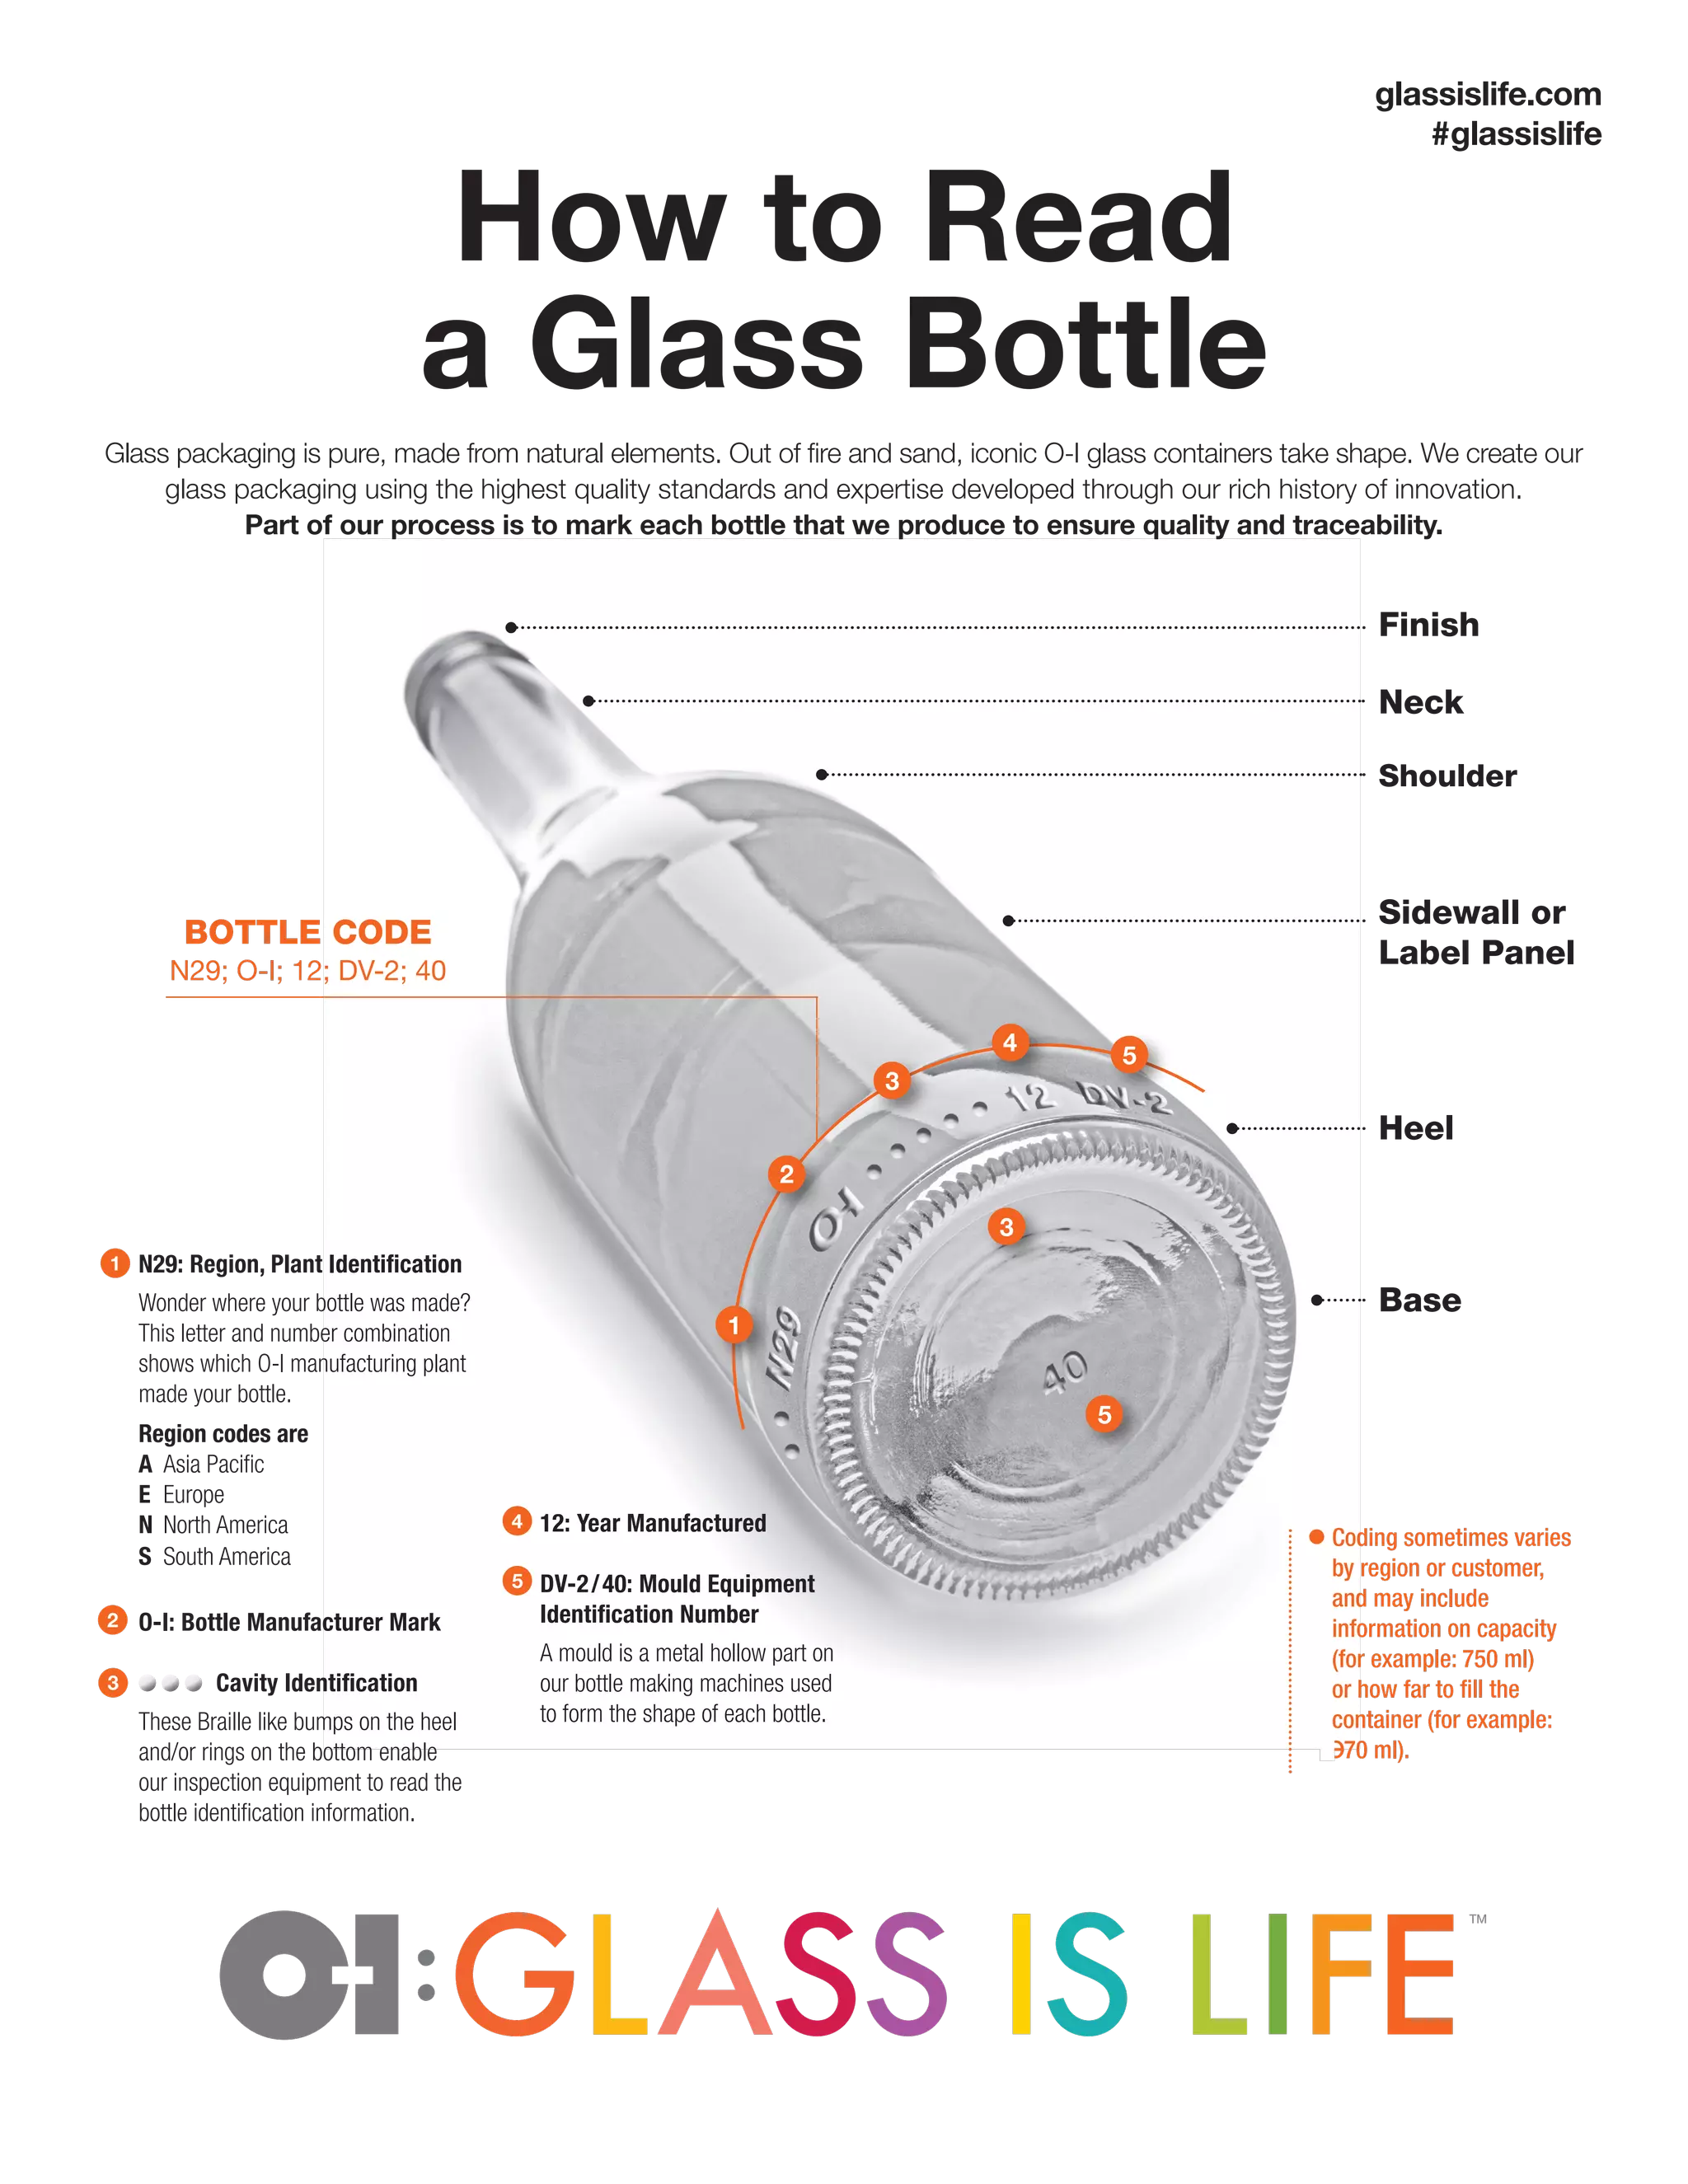

# <span style="color:green">**Task:** Student are required to develop a program to detect **eight connected lines** in the image that represent the **Bottle Code area,** as shown in example.</span>

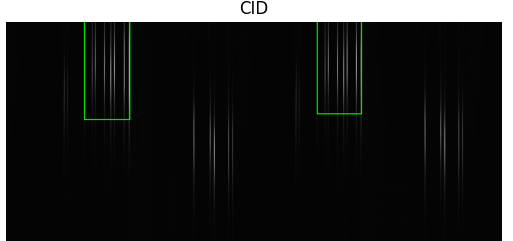

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def display(img_rgb, closing, result_img,img2, count, count2):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 6, 1)
    plt.imshow(img_rgb)
    plt.title("OG Image")
    plt.axis("off")

    plt.subplot(1, 6, 2)
    plt.imshow(closing, cmap="gray")
    plt.title("Thresholded + Morphological")
    plt.axis("off")

    plt.subplot(1, 6, 3)
    plt.imshow(result_img)
    plt.title(f"Detected Bar: {count}")
    plt.axis("off")

    plt.subplot(1, 6, 4)
    plt.imshow(img2, cmap="gray")
    plt.title(f"Detected CropBar: {count2}")
    plt.axis("off")

    plt.show()

880
3920
3653
702
3850
4185
2827
2838
32643
48360
48895


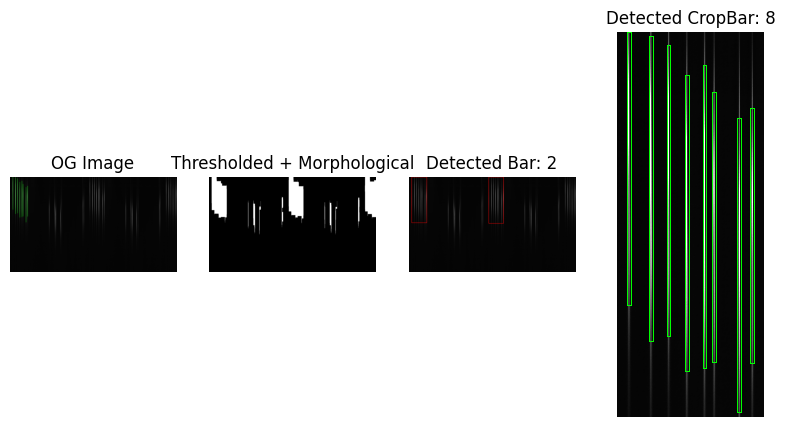

In [7]:
file = [
        r"C:\Users\jinny\Desktop\cv\image\contrast1.png", r"C:\Users\jinny\Desktop\cv\image\contrast2.png",
         r"C:\Users\jinny\Desktop\cv\image\contrast3.png", r"C:\Users\jinny\Desktop\cv\image\contrast4.png",
         r"C:\Users\jinny\Desktop\cv\image\contrast5.png", r"C:\Users\jinny\Desktop\cv\image\contrast6.png",
         r"C:\Users\jinny\Desktop\cv\image\contrast7.png", r"C:\Users\jinny\Desktop\cv\image\contrast8.png",
         r"C:\Users\jinny\Desktop\cv\image\contrast9.png", r"C:\Users\jinny\Desktop\cv\Image\contrast10.png"
         ]

img = cv2.imread(file[7], cv2.IMREAD_UNCHANGED)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=8)
contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
result_img = img_rgb.copy()
count = 0
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    area = w * h
    print(area)
    if area > 33000:
        count += 1
        cv2.rectangle(result_img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    img2 = img_rgb[y:y+h, x-10:x+w+10]

img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
blur2 = cv2.GaussianBlur(img2_gray, (5, 5), 0)
_, thresh2 = cv2.threshold(blur2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
contours2, _ = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
count2 = 0
for contour2 in contours2:
    x2, y2, w2, h2 = cv2.boundingRect(contour2)
    count2 += 1
    cv2.rectangle(img2, (x2, y2), (x2+w2, y2+h2), (0, 255, 0))

display(img_rgb, closing, result_img,img2, count, count2)

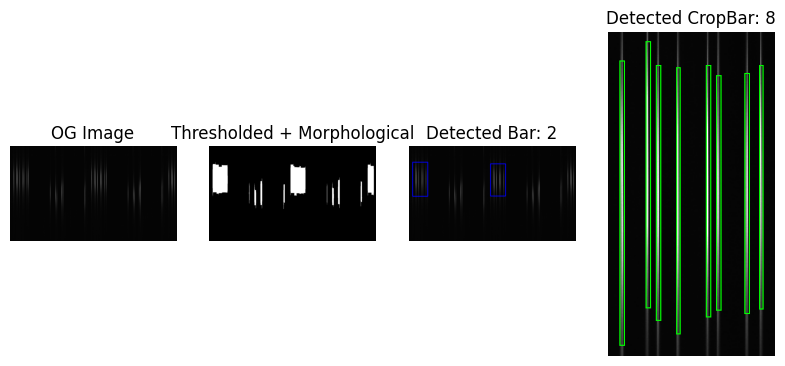

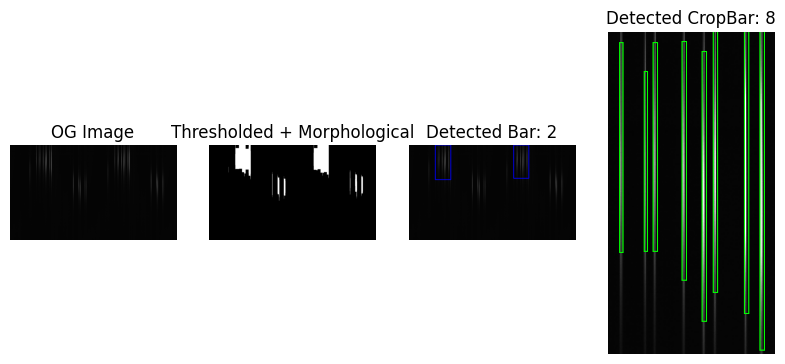

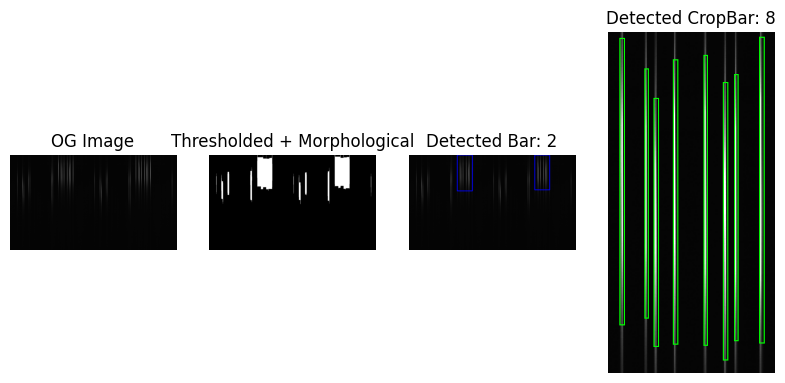

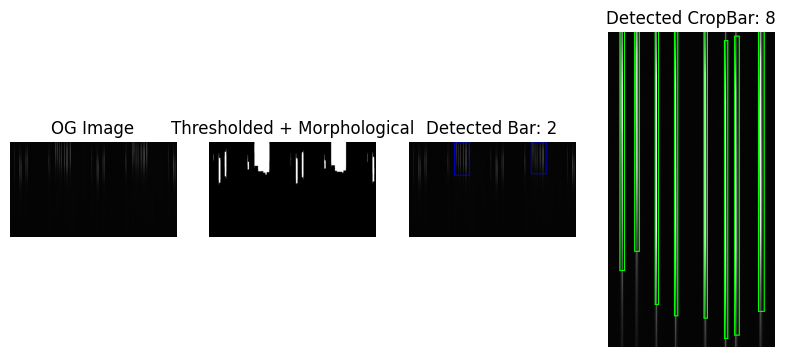

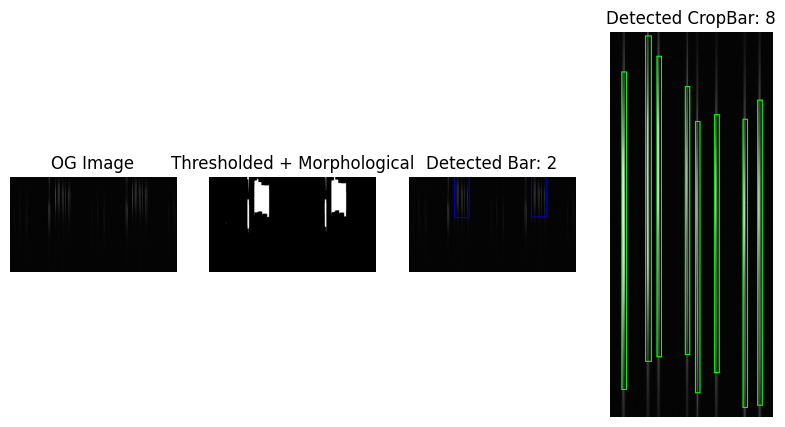

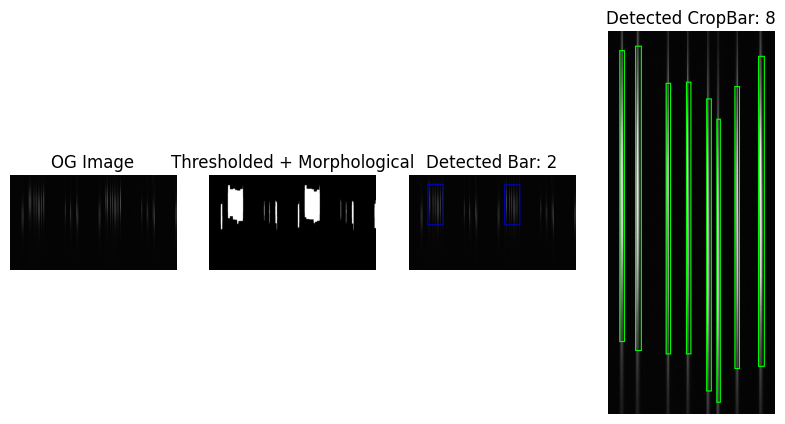

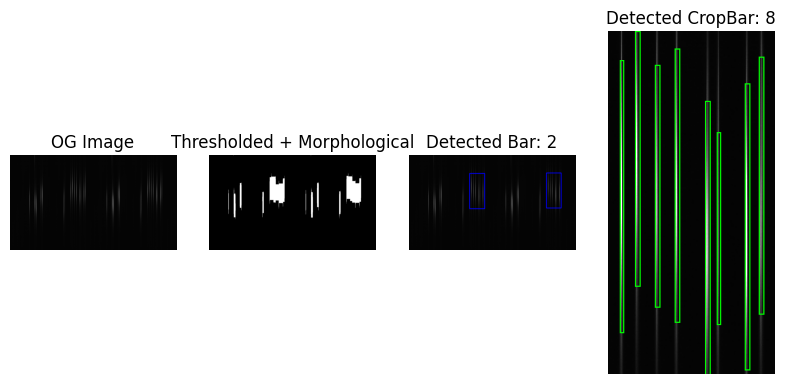

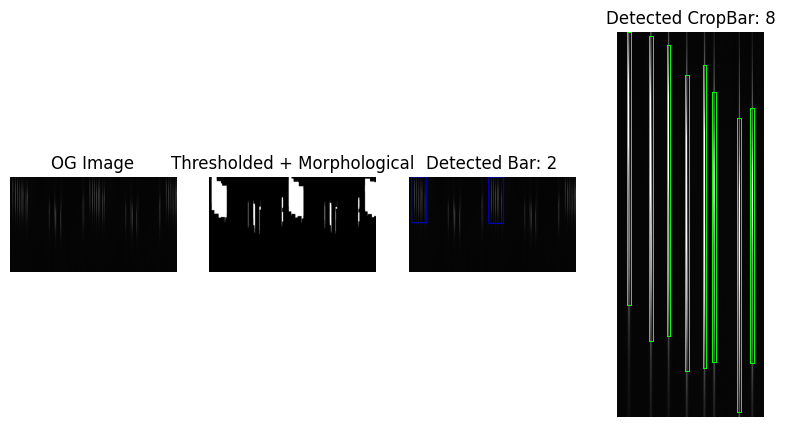

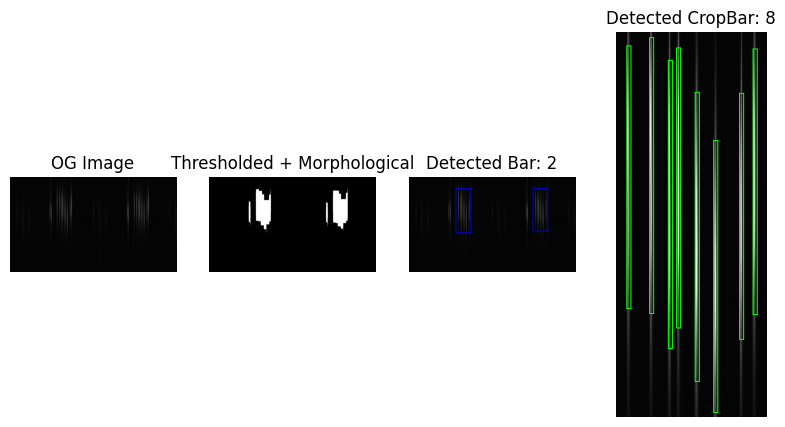

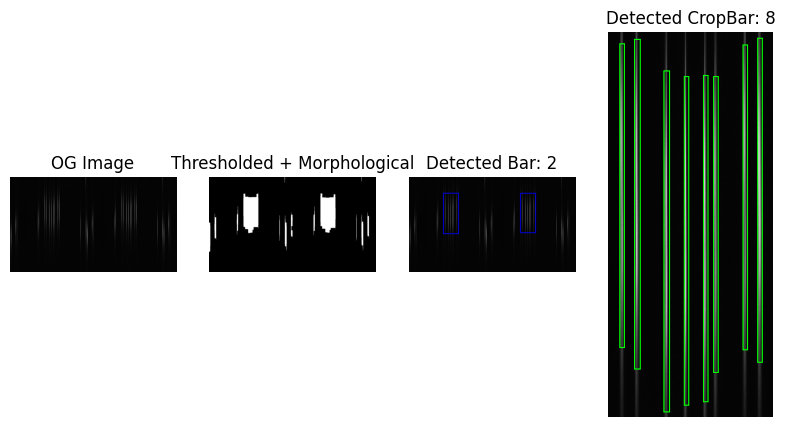

In [8]:
file = [
        r"C:\Users\jinny\Desktop\cv\image\contrast1.png", r"C:\Users\jinny\Desktop\cv\image\contrast2.png",
         r"C:\Users\jinny\Desktop\cv\image\contrast3.png", r"C:\Users\jinny\Desktop\cv\image\contrast4.png",
         r"C:\Users\jinny\Desktop\cv\image\contrast5.png", r"C:\Users\jinny\Desktop\cv\image\contrast6.png",
         r"C:\Users\jinny\Desktop\cv\image\contrast7.png", r"C:\Users\jinny\Desktop\cv\image\contrast8.png",
         r"C:\Users\jinny\Desktop\cv\image\contrast9.png", r"C:\Users\jinny\Desktop\cv\Image\contrast10.png"
         ]

# 2. ใช้ for loop เพื่อวนอ่านไฟล์ทีละไฟล์
for path in file:
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    if img is None: continue

    # แปลงสี
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Preprocessing
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Morphology
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=12)
    
    # Find Contours รอบแรก (หาตัวบาร์โค้ด)
    contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    result_img = img_rgb.copy()
    count = 0
    img2 = None # ล้างค่า img2 ทุกครั้งที่ขึ้นรูปใหม่

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        area = w * h
        if 33000 < area:
            count += 1
            cv2.rectangle(result_img, (x, y), (x+w, y+h), (0, 0, 255),5)
            # Crop ภาพออกมา (img2) - เพิ่มการตรวจสอบขอบเขตไม่ให้ติดลบ
            img2 = img_rgb[y:y+h, x-10:x+w+10].copy()
    # ตรวจสอบว่าเจอภาพ Crop (img2) หรือไม่ก่อนทำขั้นตอนต่อไป
    if img2 is not None:
        img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
        blur2 = cv2.GaussianBlur(img2_gray, (5, 5), 0)
        _, thresh2 = cv2.threshold(blur2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        contours2, _ = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        count2 = 0
        for contour2 in contours2:
            x2, y2, w2, h2 = cv2.boundingRect(contour2)
            if cv2.contourArea(contour2) > 100: # กรอง noise เล็กๆ ในบาร์โค้ด
                count2 += 1
                cv2.rectangle(img2, (x2, y2), (x2+w2, y2+h2), (0, 255, 0))
        
        # เรียกใช้ฟังก์ชัน display
        display(img_rgb, closing, result_img, img2, count, count2)
    else:
        print(f"No barcode detected in {path}")